# Predicting Heart Disease Using Machine Learning
This notebook looks into using Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition.
2. Data
3. evaluation
4. Feature
5. Modeling
6. Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameter about a patient, can we predict whether or not have heart disease?

## 2. Data
The datatset is taken from the Kaggle : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
>Name of the dataste is "UCI Heart Disease Data"

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a pateint has heart disease during the proof of concept, we'll pursue the project

## 4.Features
This is where you'll get diffent  information about each of the features in your data.

## Column Descriptions:
id (Unique id for each patient)
age (Age of the patient in years)
origin (place of study)
sex (Male/Female)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
num: the predicted attribute"

Preparing the tools
We are going to use pandas, Matplotlib, and Numpy for data analaysis and manipulation.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [6]:
df = pd.read_csv("/content/heart-disease (1).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


<Axes: >

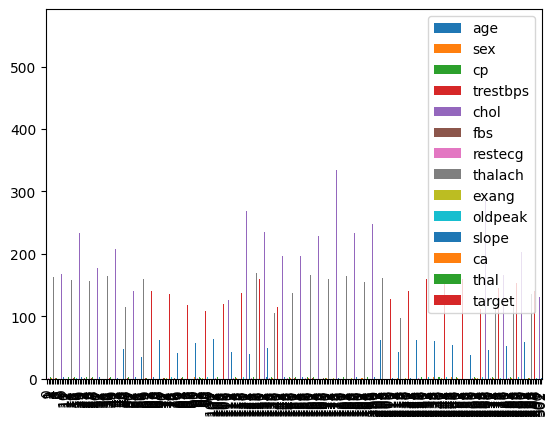

In [11]:
df.plot(kind="bar")

<Axes: xlabel='sex,target'>

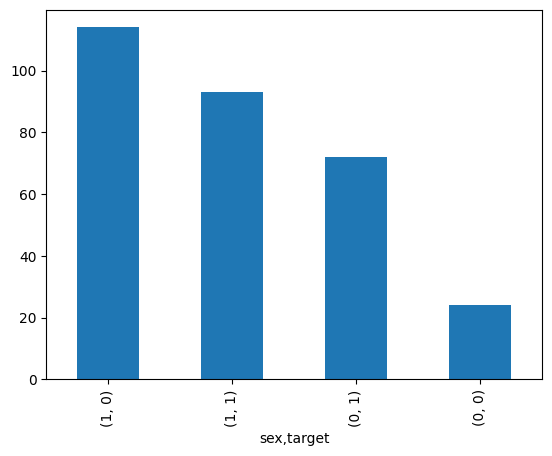

In [12]:
df[['sex', 'target']].value_counts().plot(kind="bar")

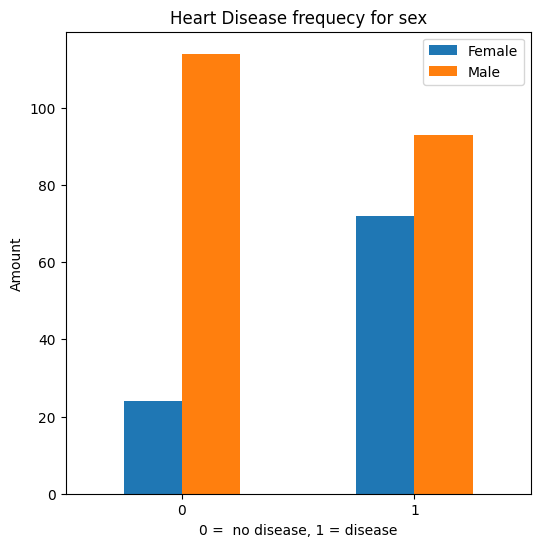

In [13]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(6,6))
plt.title("Heart Disease frequecy for sex")
plt.xlabel("0 =  no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);

(array([20., 30., 40., 50., 60., 70., 80.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

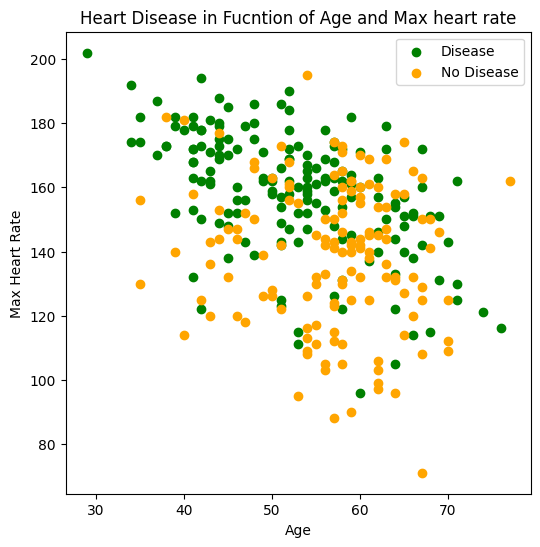

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='Green');
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='orange');
plt.title("Heart Disease in Fucntion of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Disease', 'No Disease'])
plt.xticks(rotation = 0)

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


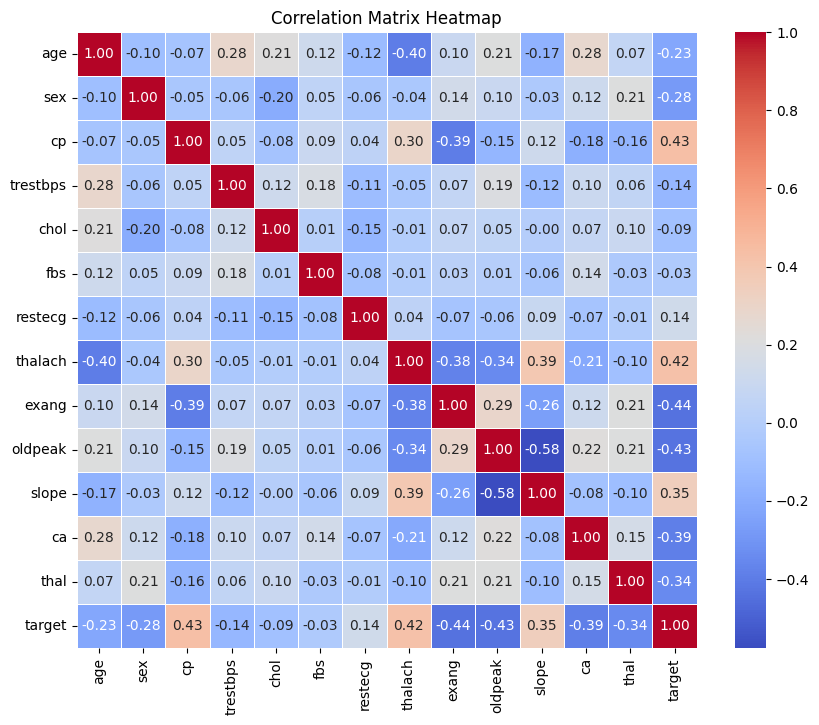

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
x = df.drop("target", axis = 1)
y = df["target"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [21]:
y_train

,target
47,1
150,1
86,1
273,0
195,0
...,...
287,0
76,1
258,0
60,1


In [22]:
models = {"Logistic Regression":LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [23]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(x_train, y_train)
    model_scores[name] = model.score(x_test, y_test)
  return model_scores

In [24]:
model_scores = fit_and_score(models= models, x_train=x_train, x_test= x_test, y_train= y_train, y_test= y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.819672131147541}

**The next step is to tune and improve the models. **

In [25]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

knn_grid = {"n_neighbors": range(1, 21)}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [26]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
np.random.seed(42)
rs_knn = RandomizedSearchCV(KNeighborsClassifier(), # Changed variable name to rs_knn
                           param_distributions= knn_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_knn.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': range(1, 21)},
                   verbose=True)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
# Evaluate Tuned Random Forest model

# Get predictions from tuned Random Forest model
y_preds_rf = rs_rf.predict(x_test)

print("Tuned Random Forest Classification Report")
print(classification_report(y_test, y_preds_rf))

print("Tuned Random Forest Confusion Matrix")
print(confusion_matrix(y_test, y_preds_rf))

rf_accuracy = accuracy_score(y_test, y_preds_rf)
rf_precision = precision_score(y_test, y_preds_rf)
rf_recall = recall_score(y_test, y_preds_rf)
rf_f1 = f1_score(y_test, y_preds_rf)

print(f"Tuned Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Tuned Random Forest Precision: {rf_precision:.2f}")
print(f"Tuned Random Forest Recall: {rf_recall:.2f}")
print(f"Tuned Random Forest F1-score: {rf_f1:.2f}")

Tuned Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        31
           1       0.70      0.70      0.70        30

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61

Tuned Random Forest Confusion Matrix
[[22  9]
 [ 9 21]]
Tuned Random Forest Accuracy: 0.70
Tuned Random Forest Precision: 0.70
Tuned Random Forest Recall: 0.70
Tuned Random Forest F1-score: 0.70


In [31]:
# Evaluate Tuned Logistic Regression model

# Get predictions from tuned Logistic Regression model
y_preds_log_reg = rs_log_reg.predict(x_test)


print("Tuned Logistic Regression Classification Report")
print(classification_report(y_test, y_preds_log_reg))

print("Tuned Logistic Regression Confusion Matrix")
print(confusion_matrix(y_test, y_preds_log_reg))

log_reg_accuracy = accuracy_score(y_test, y_preds_log_reg)
log_reg_precision = precision_score(y_test, y_preds_log_reg)
log_reg_recall = recall_score(y_test, y_preds_log_reg)
log_reg_f1 = f1_score(y_test, y_preds_log_reg)

print(f"Tuned Logistic Regression Accuracy: {log_reg_accuracy:.2f}")
print(f"Tuned Logistic Regression Precision: {log_reg_precision:.2f}")
print(f"Tuned Logistic Regression Recall: {log_reg_recall:.2f}")
print(f"Tuned Logistic Regression F1-score: {log_reg_f1:.2f}")

Tuned Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.82      0.93      0.88        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

Tuned Logistic Regression Confusion Matrix
[[25  6]
 [ 2 28]]
Tuned Logistic Regression Accuracy: 0.87
Tuned Logistic Regression Precision: 0.82
Tuned Logistic Regression Recall: 0.93
Tuned Logistic Regression F1-score: 0.88


In [38]:
# Evaluate Tuned KNN model

# Get predictions from tuned KNN model
y_preds_knn = rs_knn.predict(x_test)

print("Tuned KNN Classification Report")
print(classification_report(y_test, y_preds_knn))

print("Tuned KNN Confusion Matrix")
print(confusion_matrix(y_test, y_preds_knn))

knn_accuracy = accuracy_score(y_test, y_preds_knn)
knn_precision = precision_score(y_test, y_preds_knn)
knn_recall = recall_score(y_test, y_preds_knn)
knn_f1 = f1_score(y_test, y_preds_knn)

print(f"Tuned KNN Accuracy: {knn_accuracy:.2f}")
print(f"Tuned KNN Precision: {knn_precision:.2f}")
print(f"Tuned KNN Recall: {knn_recall:.2f}")
print(f"Tuned KNN F1-score: {knn_f1:.2f}")

Tuned KNN Classification Report
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        31
           1       0.70      0.70      0.70        30

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61

Tuned KNN Confusion Matrix
[[22  9]
 [ 9 21]]
Tuned KNN Accuracy: 0.70
Tuned KNN Precision: 0.70
Tuned KNN Recall: 0.70
Tuned KNN F1-score: 0.70


## Comparing Tuned Model Performance

Based on the evaluation metrics calculated for each tuned model, let's compare their performance to identify the best model for predicting heart disease.

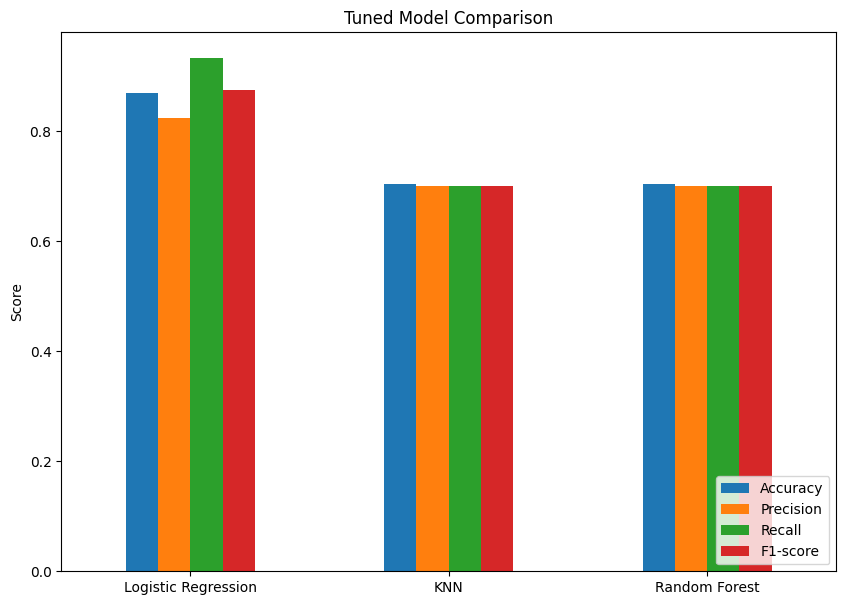

In [39]:
# Compare tuned model metrics visually

tuned_model_metrics = pd.DataFrame({
    "Logistic Regression": {"Accuracy": log_reg_accuracy, "Precision": log_reg_precision, "Recall": log_reg_recall, "F1-score": log_reg_f1},
    "KNN": {"Accuracy": knn_accuracy, "Precision": knn_precision, "Recall": knn_recall, "F1-score": knn_f1},
    "Random Forest": {"Accuracy": rf_accuracy, "Precision": rf_precision, "Recall": rf_recall, "F1-score": rf_f1}
})

tuned_model_metrics.T.plot(kind="bar", figsize=(10, 7))
plt.title("Tuned Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

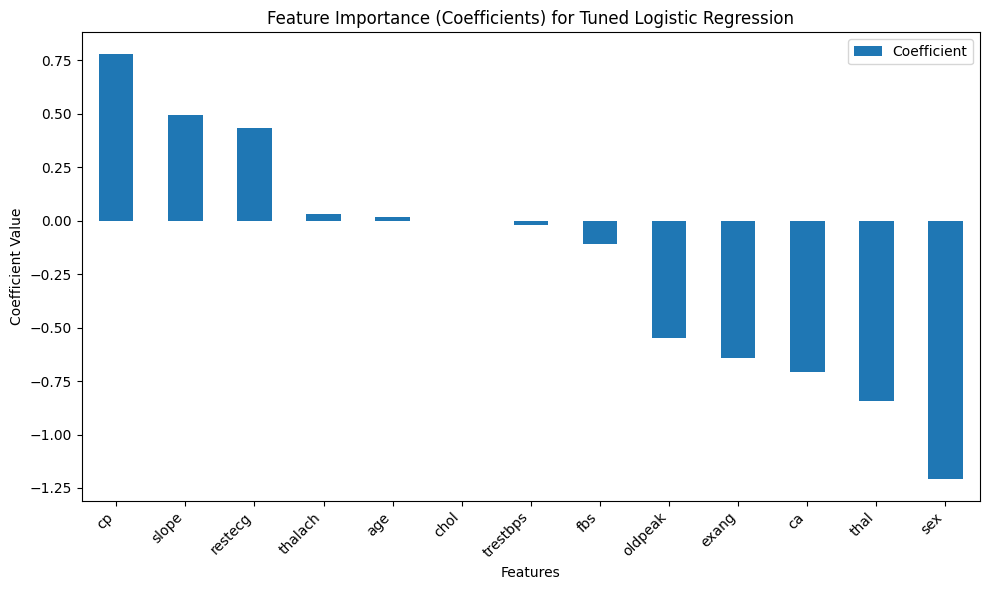

In [41]:
best_log_reg = rs_log_reg.best_estimator_

feature_importance = pd.DataFrame(best_log_reg.coef_[0], index=x.columns, columns=['Coefficient'])

feature_importance.sort_values(by='Coefficient', ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance (Coefficients) for Tuned Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conclusion

Based on the comparison of the evaluation metrics for the tuned Logistic Regression, KNN, and Random Forest models, the **Logistic Regression** model appears to be the best performing model for this dataset, achieving the highest accuracy, precision, recall, and F1-score.

This concludes our analysis and model building process for predicting heart disease.